Here is the first Part =

Part 0 Initial
---------------------


Readi file into pandas datafrme

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import os
import math
from sklearn import tree
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pydotplus
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


%matplotlib inline
dicPath = os.getcwd()
dicPathClean = os.path.join(dicPath,'Crime Prediction Data','communities-crime-clean.csv')
dicPathDirty = os.path.join(dicPath,'Crime Prediction Data','communities-crime-full.csv')

In [4]:
df=pd.read_csv(dicPathClean)
dfd = pd.read_csv(dicPathDirty)
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

Over view for the data
Part I Explore world
-----------------

In [5]:
df.shape

(1993, 105)

#### Train and Test features:


In [6]:
X = df.drop('ViolentCrimesPerPop',1).drop('highCrime',1).drop('communityname',1).drop('state',1).drop('fold',1)
y = df['highCrime']

In [7]:
dfd.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


# Here is gonna to explore the dirty data of example is the same, however, the columns aren't not => check which feature is missing

In [8]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)# so diffent set :) so convinenance

array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [9]:
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,...,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983,0.627195
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,...,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043,0.483672
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000,0.000000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000,1.000000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000,1.000000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.corr()['ViolentCrimesPerPop'].abs().nlargest(5)

ViolentCrimesPerPop    1.000000
PctIlleg               0.739266
PctKids2Par            0.739231
PctFam2Par             0.707438
racePctWhite           0.685631
Name: ViolentCrimesPerPop, dtype: float64

# 1. Decision Trees
-------------------------------------

#### 1.a Percentage data

In [11]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
print('High crime community is',pos_percentage*100,'%')

High crime community is 62.719518314099346 %


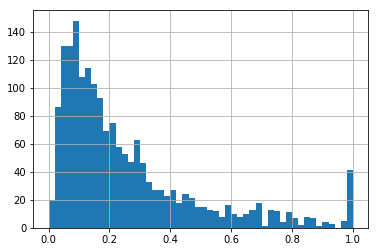

In [12]:
df['PctIlleg'].sample(n = 1800).hist(bins  = 50)

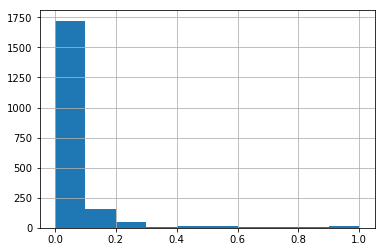

In [13]:
df.population.hist()

#### 1.b DecisionTreeClassifier Model:

In [14]:
dtclf = tree.DecisionTreeClassifier(max_depth= 3)
dtclf = dtclf.fit(X,y)

In [15]:
dt_acc_scores = cross_val_score(dtclf, X, y, cv=10, scoring='accuracy').mean()
dt_pre_scores = cross_val_score(dtclf, X, y, cv=10, scoring='precision').mean()
dt_rec_scores = cross_val_score(dtclf, X, y, cv=10, scoring='recall').mean()

In [16]:
print(dt_acc_scores);print(dt_pre_scores);print(dt_rec_scores);

0.798243718593
0.843267479959
0.8392


# 2.Linear Classification
---------

a. GaussianNB Model:
----

### 2.i) 10 Fold CV:


In [17]:
gnb = GaussianNB()
gnb_acc_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean()
gnb_pre_scores = cross_val_score(gnb, X, y, cv=10, scoring='precision').mean()
gnb_rec_scores = cross_val_score(gnb, X, y, cv=10, scoring='recall').mean()


print ('Accuracy is', gnb_acc_scores)
print ('Precision is', gnb_pre_scores)
print ('Recall is', gnb_rec_scores)

Accuracy is 0.761608040201
Precision is 0.911799814828
Recall is 0.692


### ii ) 10 most predictive features:

#### Creating a dataframe with the response variable:

In [18]:
count = 0
dictPredFeat = {}
for column in X:
    meanTrue = X[y == 1][column].mean()
    meanFalse = X[y == 0][column].mean()
    varTrue = X[y == 1][column].var()
    varFalse = X[y == 0][column].var()
    if(column != 'highCrime'):
        predScore = abs((meanTrue - meanFalse))/(math.sqrt(varFalse)+math.sqrt(varTrue))
        dictPredFeat[column] = predScore
# print(sorted(dictPredFeat.items(), key=lambda x: x[1]))
#     count = count+1

#### sort and print the last 10 features:

In [19]:
TopTenFeat = sorted(dictPredFeat.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    print(i)
# print(count)

('MalePctDivorce', 0.6165342437579264)
('PctTeen2Par', 0.6426208020335665)
('pctWInvInc', 0.6607203219208594)
('PctYoungKids2Par', 0.6646705535981033)
('TotalPctDiv', 0.6742823162675443)
('FemalePctDiv', 0.6936040623575482)
('PctIlleg', 0.7089291060645266)
('racePctWhite', 0.7348840522379364)
('PctFam2Par', 0.74516152011997)
('PctKids2Par', 0.8093364216318364)


2.b) LinearSVC:
    --------

In [20]:

svmclf = svm.SVC(kernel='linear', C =1.0)
lsvc_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
lsvc_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
lsvc_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', lsvc_acc_scores)
print ('Precision is', lsvc_pre_scores)
print ('Recall is', lsvc_rec_scores)

Accuracy is 0.804753768844
Precision is 0.855179372789
Recall is 0.8376


#### 2.B) Absolute feature weights( ie the coefficients of the hyperplance vector)

In [21]:
svmclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
TopTenFeat_SVM = {}
count = 0
for i in X.columns:
    TopTenFeat_SVM[i] = abs(svmclf.coef_[0][count])
    count = count+ 1
# print(sorted(TopTenFeat_SVM))
# for key, value in sorted(TopTenFeat_SVM.items()):
#     print(key,TopTenFeat_SVM[key])
TopTenFeat = sorted(TopTenFeat_SVM.items(), key=lambda x: x[1])[-10:]
for i in TopTenFeat:
    print(i)

('agePct12t21', 0.98442987941004556)
('RentHighQ', 0.99163825361111957)
('PersPerOccupHous', 1.0275543973528991)
('MalePctDivorce', 1.073578841827074)
('population', 1.1086454264275147)
('PctFam2Par', 1.5426528869036265)
('racepctblack', 1.7203177655788284)
('PctKids2Par', 2.0576723456134776)
('racePctWhite', 2.2351581784693813)
('pctWInvInc', 2.3861552101921903)


# 3.Regression
---------

### a. Linear Regression:


In [23]:
y_reg = df['ViolentCrimesPerPop']
# print(y_reg)
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y_reg,None,scoring='neg_mean_squared_error',cv=10)

## 3.a)I
----------------------------
Using 10-fold cross-validation, what is the estimated mean-
squared-error (MSE) of the model?

In [24]:
print(np.abs(lr_scores.mean()))
# print(scores)

0.0200939693044


### 3.a)II What is the MSE on the training set

In [25]:
lr_1.fit(X,y)
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X) - y_reg) ** 2))

Mean squared error: 0.21


### 3.a)III What features are most predictive of a high crime rate? A low crime rate?
-----------------


It’s easy to think that variables with larger coefficients are more important because they represent a larger change in the response.

Since the features scale has been standardized, we can pick highest and lowest coefficent for the most predictive value.

In [26]:
print('Coefficients: \n', lr.coef_)
ls_coef_lr = np.array(lr.coef_)
max_feature = np.where(ls_coef_lr == ls_coef_lr.max())

Coefficients: 
 [  3.92893069e+00  -4.72988475e-01   7.12653984e-03  -3.07913352e-01
   8.00925727e-02   3.73350141e-01   3.38705557e-02   1.05751191e-01
   1.31793715e-01   4.09786934e-01  -2.83057873e+00   1.55829374e-01
  -1.01150012e+00  -4.04683340e-01   9.28910249e-02  -9.46254374e-01
  -3.29832636e-01  -1.01982922e-01   1.75570256e-02   9.26851094e-01
   3.68235781e-01  -1.60868569e-01  -3.90602631e-02   4.10138565e-02
  -5.49169780e-02   1.41410682e-01  -1.21712883e-01  -2.45149609e-01
  -1.24365346e-01  -7.22382606e-02  -7.32844884e-02  -4.92669766e-01
   3.02212207e-02   1.46580853e-01  -8.85614849e-02  -1.76563098e-01
   3.06366098e-02   7.43965217e-01   5.99112583e-01   9.22660049e-02
   4.34262821e-01  -6.51321368e-01  -1.71280681e-01   5.88978471e-02
  -1.23646334e+00   8.06257423e-02   2.74478983e-01  -2.20974836e-02
   9.12656982e-02  -8.47099742e-01  -8.41633406e-02  -1.73340558e-01
   1.80238493e-01  -2.35033456e-01  -1.37413185e-01   3.31179994e-01
  -5.69406383e-01 

#### iii) Most predictive toward high crime:

In [27]:
X.columns[np.argmax(ls_coef_lr)]

'population'

#### iii) Most predictive toward low crime :

In [28]:
X.columns[np.argmin(ls_coef_lr)]

'numbUrban'

Ridge Regression
------------------

In [29]:
param_range = np.logspace(-3, 1, 10)
train_scores, test_scores = validation_curve(
    linear_model.Ridge (), X, y_reg, param_name="alpha", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

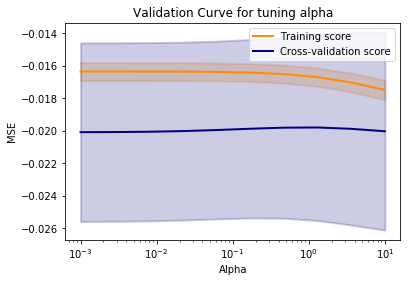

In [30]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [31]:
lrr = linear_model.Ridge(alpha = 0.001)

In [32]:
lrr.fit(X,y_reg)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(X) - y_reg) ** 2))

Mean squared error: 0.02


polynomial features
--------

In [34]:
poly = PolynomialFeatures(degree  = 2,interaction_only = False)
poly_init = poly.fit_transform(X)

param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(
    PolynomialFeatures(), initial, Y, param_name="degree", param_range=param_range,
    cv=10, scoring="neg_mean_squared_error", n_jobs=1)

Crete polynomial feature

In [35]:
lrr.fit(poly_init,y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
print("Mean squared error: %.2f"
      % np.mean((lrr.predict(poly_init) - y_reg) ** 2))

Mean squared error: 0.30


In [37]:
df_poly = pd.DataFrame(poly_init)

In [38]:
X.shape

(1993, 100)

In [39]:
poly_init.shape

(1993, 5151)

In [40]:
lrr = linear_model.Ridge(alpha = 0.001)
scores = cross_val_score(lrr, poly_init, y_reg,None,scoring='mean_squared_error',cv=10,n_jobs = -1)

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.4/dist-packages/sklearn/metri

In [41]:
scores

array([-0.14227491, -0.13626447, -0.18361291, -0.09502172, -0.07243209,
       -0.1266391 , -0.08427071, -0.06765191, -0.16015351, -0.12677151])

In [42]:
print(scores.mean())

-0.119509285845


# 4.Dirty Data
---------

#### Finding the extra features

In [43]:
ls_col_desc_dfd = np.array(dfd.describe().columns)
ls_col_head_dfd = np.array(dfd.head().columns)
np.intersect1d(ls_col_desc_dfd,ls_col_head_dfd)
np.setdiff1d(ls_col_head_dfd,ls_col_desc_dfd)


array(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'OtherPerCap', 'PctPolicAsian',
       'PctPolicBlack', 'PctPolicHisp', 'PctPolicMinor', 'PctPolicWhite',
       'PolicAveOTWorked', 'PolicBudgPerPop', 'PolicCars', 'PolicOperBudg',
       'PolicPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'community', 'communityname', 'county'], dtype=object)

In [44]:
dfd = pd.read_csv(dicPathDirty)


There 2 Way to replace ? mark. 1. replace  2. appmap
1.

In [45]:
dfd_clean = dfd.replace('?',np.nan)

In [46]:
y_train = np.where(dfd_clean['ViolentCrimesPerPop']>0.1, 1, 0)
del dfd_clean['communityname']
del dfd_clean['county']
del dfd_clean['community']
del dfd_clean['state']
del dfd_clean['ViolentCrimesPerPop']
del dfd_clean['fold']

In [47]:
cols_numeric = dfd_clean.columns

In [48]:
imputer = Imputer(missing_values = np.nan,
                                          strategy="mean",
                                          axis=0)

In [49]:
dfd_clean = imputer.fit_transform(dfd_clean)
dfd_clean = pd.DataFrame(dfd_clean)
dfd_clean.columns = cols_numeric

In [50]:
np.random.seed(40)

In [51]:
dfd_cleanclf = tree.DecisionTreeClassifier(max_depth= 3)
scores = cross_val_score(dfd_cleanclf, dfd_clean,y_train,None,scoring='accuracy',cv=10)

In [52]:
print(scores.mean())

0.812946286157


# 5. TEAM WORK
---------

## RadomForeset
--------------------------

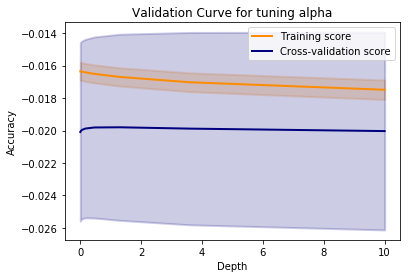

In [51]:
plt.title("Validation Curve for tuning alpha")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

lw = 2
#plt.semilogx(param_range, train_scores_mean, label="Training score",
#             color="darkorange", lw=lw)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy",lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [52]:
rf_clf = RandomForestClassifier(random_state=100, max_depth=3)

rf_acc_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy').mean()
rf_pre_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='precision').mean()
rf_rec_scores = cross_val_score(rf_clf, X, y, cv=10, scoring='recall').mean()

In [53]:
print ('Accuracy is', rf_acc_scores)
print ('Precision is', rf_pre_scores)
print ('Recall is', rf_rec_scores)

Accuracy is 0.801253768844
Precision is 0.83338783622
Recall is 0.8616


In [ ]:
param_range = range(1,10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

## Nonlinear SVM
---------------------

Fine tuning Panelty coefficient => We pick C = 46

In [ ]:
param_range = np.logspace(-1, 2, 10)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='poly'), X, y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for tuning alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
test_scores_mean

In [ ]:
param_range

In [ ]:
svmclf = svm.SVC(kernel='poly', C =46)
nsvm_acc_scores = cross_val_score(svmclf, X, y, cv=10, scoring='accuracy').mean()
nsvm_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
nsvm_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', nsvm_acc_scores)
print ('Precision is', nsvm_pre_scores)
print ('Recall is', nsvm_rec_scores)


## i. Summery for All classification
----------------------------

In Classification , we apply:


a)Decision Tree
b)Random forest
c)LinearSVC
d)Polynomial kernal SVM


In [ ]:
ls = [[],[]]

# Extra Credit: K-Means
---------

In [ ]:
from sklearn.cluster import KMeans
kmClf = KMeans(n_clusters = 2)
km_acc_scores = cross_val_score(kmClf, X, y, cv=10, scoring='accuracy').mean()
km_pre_scores = cross_val_score(svmclf, X, y, cv=10, scoring='precision').mean()
km_rec_scores = cross_val_score(svmclf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is', km_acc_scores)
print ('Precision is', km_acc_scores)
print ('Recall is', km_acc_scores)

#### The above K-Means is not the perfect model for labeled data that predicts a category
#### Hence it shows varriying cross validated metrics mean value on each run

# Comparasion 
------------------------------




## Classification
----------------------------

In Classification , we apply:


a)Decision Tree
b)Random forest
c)LinearSVC
d)Polynomial kernal SVM
e)K-mean



## Regession
------------------------
a)Linear Regression
b)Linar Ridge Regression
c)Polynomial Regression
